# Impact of Online Classes During the COVID-19 Pandemic

The COVID-19 pandemic caused a rapid global shift to online learning, challenging students with limited technology access, reduced academic engagement, and heightened emotional and financial stress, while teachers faced heavier workloads, urgent digital upskilling, and rising burnout. By analyzing these two groups simultaneously—through a global student dataset and a dataset on Brazilian teachers’ digital competence and exhaustion—this study provides an integrated view of how the pandemic reshaped both learning and teaching. This combined perspective highlights the interconnected pressures within the education system and underscores the need for more resilient and equitable digital learning environments moving forward.

# Data Preprocessing and Cleaning

## Setup

In [2]:
# ============================================
# SETUP & IMPORTS
# ============================================

import pandas as pd
import numpy as np
import os
import re

# Detect if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")
except:
    IN_COLAB = False
    print("Running locally")

# Define file paths based on environment
if IN_COLAB:
    # Mount Google Drive
    from google.colab import drive
    drive.mount('/content/drive')
    
    # Set paths - UPDATE THESE to match your Google Drive structure
    RAW_DATA_DIR = '/content/drive/MyDrive/bi_data_viz/data'
    PROCESSED_DATA_DIR = '/content/drive/MyDrive/bi_data_viz/data/processed'
    
else:
    # Local paths
    RAW_DATA_DIR = '../data'
    PROCESSED_DATA_DIR = '../data/processed'

# Create processed directory if it doesn't exist
os.makedirs(PROCESSED_DATA_DIR, exist_ok=True)

print(f"\nWorking Directory: {os.getcwd()}")
print(f"Data Source: {RAW_DATA_DIR}")
print(f"Export Target: {PROCESSED_DATA_DIR}")
print("\n✓ Setup complete")

Running locally

Working Directory: c:\Users\monte\Desktop\Folders\School\Business Int\ProjectDev\bi_data_viz\notebooks
Data Source: ../data
Export Target: ../data/processed

✓ Setup complete


## Phase 1: Data Ingestion

In [42]:
# ============================================
# PHASE 1: DATA INGESTION
# ============================================

# Helper function for flexible sheet detection
def find_sheet(xls_file, possible_names):
    """Find sheet by trying multiple name variations"""
    available = xls_file.sheet_names
    for name in possible_names:
        # Exact match
        if name in available:
            return name
        # Case-insensitive match
        for sheet in available:
            if sheet.lower() == name.lower():
                return sheet
    # If not found, return first sheet as fallback
    print(f"    None of {possible_names} found. Using first sheet: {available[0]}")
    return available[0]

# --- Load Student Survey ---
student_path = os.path.join(RAW_DATA_DIR, 'student_survey.xlsx')
student_xls = pd.ExcelFile(student_path)

print(f" Student Survey File: {student_path}")
print(f"   Available sheets: {student_xls.sheet_names}")

# Find the data and codebook sheets
data_sheet = find_sheet(student_xls, ['Data', 'data', 'DATA', 'responses', 'raw_data'])
codebook_sheet = find_sheet(student_xls, ['Codebook', 'codebook', 'CODEBOOK', 'metadata', 'dictionary'])

print(f"   Using data sheet: '{data_sheet}'")
print(f"   Using codebook sheet: '{codebook_sheet}'")

# Read the sheets
df_student_raw = pd.read_excel(student_xls, sheet_name=data_sheet)
df_student_meta = pd.read_excel(student_xls, sheet_name=codebook_sheet)

print(f"   Student data shape: {df_student_raw.shape}")
print(f"   Student codebook shape: {df_student_meta.shape}")

# --- Load Teacher Burnout ---
teacher_path = os.path.join(RAW_DATA_DIR, 'teacher_burnout.xlsx')
teacher_xls = pd.ExcelFile(teacher_path)

print(f"\n Teacher Burnout File: {teacher_path}")
print(f"   Available sheets: {teacher_xls.sheet_names}")

# Find the data and subtitles sheets
data_sheet_t = find_sheet(teacher_xls, ['Data base', 'Data_base', 'Database', 'data', 'Data'])
subtitle_sheet = find_sheet(teacher_xls, ['Subtitles (codes)', 'Subtitles', 'codes', 'Codes', 'legend'])

print(f"   Using data sheet: '{data_sheet_t}'")
print(f"   Using subtitle sheet: '{subtitle_sheet}'")


df_teacher_raw = pd.read_excel(teacher_xls, sheet_name=data_sheet_t, header=1)  # Skip row 0, use row 1 as header


df_teacher_raw = df_teacher_raw.dropna(how='all').reset_index(drop=True)


df_teacher_meta = pd.read_excel(teacher_xls, sheet_name=subtitle_sheet, header=0)

print(f"   Teacher data shape: {df_teacher_raw.shape}")
print(f"   Teacher subtitles shape: {df_teacher_meta.shape}")

# Preview the columns to verify
print(f"\n   Teacher columns preview: {list(df_teacher_raw.columns[:5])}")

print("\n" + "="*80)
print("✓ PHASE 1 COMPLETE - Data Ingestion Successful")
print("="*80)

 Student Survey File: ../data\student_survey.xlsx
   Available sheets: ['data', 'codebook']
   Using data sheet: 'data'
   Using codebook sheet: 'codebook'
   Student data shape: (31212, 161)
   Student codebook shape: (178, 4)

 Teacher Burnout File: ../data\teacher_burnout.xlsx
   Available sheets: ['Data base', 'Subtitles (codes)', 'Open question']
   Using data sheet: 'Data base'
   Using subtitle sheet: 'Subtitles (codes)'
   Teacher data shape: (438, 83)
   Teacher subtitles shape: (2, 83)

   Teacher columns preview: ['Age:', 'Sex:', 'Marital status:', 'I live with:', 'Area of knowledge in which it operates:']

✓ PHASE 1 COMPLETE - Data Ingestion Successful


## Phase 1.5 DATA STRUCTURE INSPECTION

In [43]:
# ============================================
# PHASE 1.5: DATA STRUCTURE INSPECTION
# ============================================

print("="*80)
print("STUDENT SURVEY - CODEBOOK STRUCTURE")
print("="*80)
print(f"Columns: {df_student_meta.columns.tolist()}")
print(f"Shape: {df_student_meta.shape}")
display(df_student_meta.head(15))

print("\n" + "="*80)
print("STUDENT SURVEY - RAW DATA STRUCTURE")
print("="*80)
print(f"Columns: {df_student_raw.columns.tolist()[:20]}...")  # First 20 columns
print(f"Shape: {df_student_raw.shape}")
display(df_student_raw.head(3))

print("\n" + "="*80)
print("TEACHER BURNOUT - SUBTITLES (CODES) STRUCTURE")
print("="*80)
print(f"Columns: {df_teacher_meta.columns.tolist()}")
print(f"Shape: {df_teacher_meta.shape}")
display(df_teacher_meta.head(3))

print("\n" + "="*80)
print("TEACHER BURNOUT - RAW DATA STRUCTURE")
print("="*80)
print(f"Columns: {df_teacher_raw.columns.tolist()}")
print(f"Shape: {df_teacher_raw.shape}")
display(df_teacher_raw.head(3))

STUDENT SURVEY - CODEBOOK STRUCTURE
Columns: ['name', 'label', 'values', 'remarks']
Shape: (178, 4)


,name,label,values,remarks
0,Q1,In which country do you study (in this semeste...,NaN,NaN
1,Q3,Are you a citizen of the country in which you ...,"1: ""Yes"", 2: ""No""",NaN
2,Q4,What is your student status?,"1: ""Full-time"", 2: ""Part-time""",NaN
3,Q5,What level of study you are enrolled in?,"1: ""Bachelor’s degree"", 2: ""Master’s degree"", ...",NaN
4,Q6,Please indicate your main field of study.,"1: ""Arts"", 2: ""Social"", 3: ""Natural"", 4: ""Tech...",NaN
5,Q7,How old are you (in years)? (Click and write ),NaN,NaN
6,Q8,What is your gender?,"1: ""Male"", 2: ""Female"", 3: ""Gender diverse"", 4...",NaN
7,Q9,Have your on-site classes (those taking place ...,"1: ""Yes"", 2: ""No""",NaN
8,Q10,"Since on-site classes were cancelled, the orga...",NaN,introduction to set of questions
9,Q10a,Online in real-time (videoconference),"1: ""Very dissatisfied"", 2: ""Dissatisfied"", 3: ...",NaN



STUDENT SURVEY - RAW DATA STRUCTURE
Columns: ['Q1', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10a', 'Q10b', 'Q10c', 'Q10d', 'Q10e', 'Q11', 'Q12a', 'Q12b', 'Q12c', 'Q12d', 'Q12e', 'Q13']...
Shape: (31212, 161)


,Q1,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10a,Q10b,...,Q38h_2,Q38i_2,Q38j_2,Q38k_2,Q38l_2,Q38m_2,Q38n_2,Q38o_2,Q38p_2,SOURCE
0,Afghanistan,1.0,1.0,1.0,3.0,62.0,3.0,2.0,1.0,1.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,3.0,2.0,pt
1,Afghanistan,2.0,1.0,3.0,4.0,NaN,3.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en
2,Afghanistan,1.0,2.0,1.0,1.0,28.0,1.0,1.0,NaN,NaN,...,3.0,3.0,3.0,2.0,4.0,2.0,1.0,1.0,1.0,en



TEACHER BURNOUT - SUBTITLES (CODES) STRUCTURE
Columns: ['Age:', 'Sex:', 'Marital status:', 'I live with:', 'Area of knowledge in which it operates:', 'Level of training (titration)', 'Main level of education in which it operates:', 'Number of institutions or schools in which you act as a teacher:', 'The main institution(s) of activity are the network(s):', 'Official or contractual weekly workload:', 'Weekly workload effectively dedicated to work during pandemic', 'Time of acting as a teacher:', 'Considering the devices and technological resources, indicate those to which you have (1) and do not have access (0): [Mobile]', 'Considering the devices and technological resources, indicate those you have (1) and do not have access (0): [Desktop computer]', 'Considerando os dispositivos e recursos tecnológicos, indique aqueles a que tem (1) e não tem acesso (0): [Computador portátil (notebook)]', 'Considerando os dispositivos e recursos tecnológicos, indique aqueles a que tem (1) e não tem a

,Age:,Sex:,Marital status:,I live with:,Area of knowledge in which it operates:,Level of training (titration),Main level of education in which it operates:,Number of institutions or schools in which you act as a teacher:,The main institution(s) of activity are the network(s):,Official or contractual weekly workload:,...,MBI -14I didn't worry about what happens to some students during the pandemic [-],MBI -15 I didn't worry about what happens to some students during the pandemic [-],MBI -16 I feel that I can easily create a pleasant atmosphere with my students in remote teaching [-],MBI -17I feel motivated after working with my students even remotely [-],MBI -18 I believe I get many valuable things in my job as a teacher in the pandemic [-],"MBI -19In the pandemic, I feel at the limit of my possibilities at work [-]",MBI -20I think students blame me more for some of their problems in remote teaching than in the face-to-face [-],MBI -final score,Have you had friends and/or close people who have contracted Covid 19?,Have you lost any friends or close people by Covid 19?
0,(in years),Female (1) Male (2),Single (1) Married or married (2) Divorced or ...,NaN,1-human /2-biological ) 3-Linguistica / 4 - he...,High school (1) Incomplete graduation (2) Comp...,ECE = Early Childhood Education (1); ES = Elem...,(in whole number),Private (1) Public (2),Up to 10 h per week (1) From 11 to 20 h per we...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sum of the score of the 20 items of the MBI,Yes (1) No(2),NaN
1,* Questions/items in red had the assigned scor...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



TEACHER BURNOUT - RAW DATA STRUCTURE
Columns: ['Age:', 'Sex:', 'Marital status:', 'I live with:', 'Area of knowledge in which it operates:', 'Level of training (titration)', 'Main level of education in which it operates:', 'Number of institutions or schools in which you act as a teacher:', 'The main institution(s) of activity are the network(s):', 'Official or contractual weekly workload:', 'Weekly workload effectively dedicated to work during pandemic', 'Time of acting as a teacher:', 'Considering the devices and technological resources, indicate those to which you have (1) and do not have access (0): [Mobile]', 'Considering the devices and technological resources, indicate those you have (1) and do not have access (0): [Desktop computer]', 'Considerando os dispositivos e recursos tecnológicos, indique aqueles a que tem (1) e não tem acesso (0): [Computador portátil (notebook)]', 'Considerando os dispositivos e recursos tecnológicos, indique aqueles a que tem (1) e não tem acesso (0)

,Age:,Sex:,Marital status:,I live with:,Area of knowledge in which it operates:,Level of training (titration),Main level of education in which it operates:,Number of institutions or schools in which you act as a teacher:,The main institution(s) of activity are the network(s):,Official or contractual weekly workload:,...,MBI -14I didn't worry about what happens to some students during the pandemic [-],MBI -15 I didn't worry about what happens to some students during the pandemic [-],MBI -16 I feel that I can easily create a pleasant atmosphere with my students in remote teaching [-],MBI -17I feel motivated after working with my students even remotely [-],MBI -18 I believe I get many valuable things in my job as a teacher in the pandemic [-],"MBI -19In the pandemic, I feel at the limit of my possibilities at work [-]",MBI -20I think students blame me more for some of their problems in remote teaching than in the face-to-face [-],MBI -final score,Have you had friends and/or close people who have contracted Covid 19?,Have you lost any friends or close people by Covid 19?
0,56,1,2,"My partner or wife/husband, Adult Son(s), Pet ...",1,6,5,2,2,5,...,2,3,1,2,2.0,2,NaN,38,1,1
1,40,1,2,"Partner or wife/husband, Son(s) who is a child(s)",2,6,5,1,2,4,...,4,0,4,4,2.0,2,0.0,34,1,2
2,56,1,1,Adult child(s),3,6,5,1,2,5,...,4,0,2,4,4.0,0,0.0,36,1,2


## PHASE 2: MAPPING LOGIC

In [44]:
# ============================================
# PHASE 2: MAPPING LOGIC
# ============================================

def parse_student_values(values_str):
    """
    Parses student codebook 'values' column.
    Example: '1: "Full-time", 2: "Part-time"' → {1: 'Full-time', 2: 'Part-time'}
    """
    if pd.isna(values_str) or values_str.strip() == '':
        return {}
    
    mapping = {}
    pairs = values_str.split(',')
    
    for pair in pairs:
        if ':' in pair:
            try:
                code_part, label_part = pair.split(':', 1)
                code = code_part.strip()
                label = label_part.strip().strip('"').strip("'")
                
                try:
                    code = int(code)
                except ValueError:
                    pass
                
                mapping[code] = label
            except Exception as e:
                print(f"Warning: Could not parse pair '{pair}': {e}")
                continue
    
    return mapping


def create_student_mappings(codebook_df):
    """
    Creates {column_name: {code: label}} dictionary from student codebook.
    """
    mappings = {}
    
    for _, row in codebook_df.iterrows():
        col_name = row['name']
        values_str = row['values']
        value_map = parse_student_values(values_str)
        
        if value_map:
            mappings[col_name] = value_map
    
    return mappings


def parse_teacher_subtitle(subtitle_text):
    """
    Parses teacher subtitle format.
    Examples:
    - "Female (1) Male (2)" → {1: 'Female', 2: 'Male'}
    - "Single (1) Married or married (2)" → {1: 'Single', 2: 'Married or married'}
    - "(in years)" → {} (no mapping, it's a description)
    """
    if pd.isna(subtitle_text) or subtitle_text.strip() == '':
        return {}
    
    mapping = {}
    
    # Pattern to match: text followed by (number)
    # More flexible to handle multi-word labels
    pattern = r'([^()]+?)\s*\((\d+)\)'
    matches = re.findall(pattern, subtitle_text)
    
    for label, code in matches:
        label = label.strip()
        # Remove trailing punctuation and extra spaces
        label = re.sub(r'[/\s]+$', '', label)
        code = int(code)
        
        # Only add if label is meaningful (not empty or just punctuation)
        if label and len(label) > 1:
            mapping[code] = label
    
    return mapping


def create_teacher_mappings(subtitle_df):
    """
    Creates {column_name: {code: label}} dictionary from teacher subtitles.
    The subtitle sheet has:
    - Row 0: Column names (same as data columns)
    - Row 1: Coding information
    """
    mappings = {}
    
    if len(subtitle_df) < 1:
        print("⚠ Warning: Teacher subtitle sheet is empty")
        return mappings
    
    # Get the first row which contains the coding information
    coding_row = subtitle_df.iloc[0]
    
    for col_name in subtitle_df.columns:
        subtitle_text = str(coding_row[col_name])
        value_map = parse_teacher_subtitle(subtitle_text)
        
        if value_map:
            mappings[col_name] = value_map
    
    return mappings


print("✓ Custom parsing functions defined")

print("\n--- Testing Student Parser ---")
test_student = '1: "Full-time", 2: "Part-time"'
print(f"Input: {test_student}")
print(f"Output: {parse_student_values(test_student)}")

print("\n--- Testing Teacher Parser ---")
test_cases = [
    "Female (1) Male (2)",
    "Single (1) Married or married (2) Divorced or separated (3) Widower (4)",
    "(in years)",
    "Yes (1)    No(2)"
]

for test in test_cases:
    result = parse_teacher_subtitle(test)
    print(f"Input: {test}")
    print(f"Output: {result}")
    print()

✓ Custom parsing functions defined

--- Testing Student Parser ---
Input: 1: "Full-time", 2: "Part-time"
Output: {1: 'Full-time', 2: 'Part-time'}

--- Testing Teacher Parser ---
Input: Female (1) Male (2)
Output: {1: 'Female', 2: 'Male'}

Input: Single (1) Married or married (2) Divorced or separated (3) Widower (4)
Output: {1: 'Single', 2: 'Married or married', 3: 'Divorced or separated', 4: 'Widower'}

Input: (in years)
Output: {}

Input: Yes (1)    No(2)
Output: {1: 'Yes', 2: 'No'}



## PHASE 3A: DECODE STUDENT DATA

In [45]:
# ============================================
# PHASE 3A: DECODE STUDENT DATA
# ============================================

# Create mappings from the codebook
student_mappings = create_student_mappings(df_student_meta)

print(f"Created mappings for {len(student_mappings)} student columns")
print(f"Sample columns with mappings: {list(student_mappings.keys())[:5]}")

# Create a copy to work on
df_student_clean = df_student_raw.copy()

# Apply mappings
decoded_count = 0
for col in df_student_clean.columns:
    if col in student_mappings:
        print(f"  Decoding: {col}")
        # Map values, keep original if no match found
        df_student_clean[col] = df_student_clean[col].map(student_mappings[col]).fillna(df_student_clean[col])
        decoded_count += 1

print(f"\n✓ Decoded {decoded_count} columns in student data")

# Add metadata columns
df_student_clean['User_Type'] = 'Student'
df_student_clean['Dataset_Source'] = 'Global_Student_Survey_COVID19'

print("\n--- STUDENT DATA SAMPLE (DECODED) ---")
# Show some key columns if they exist
sample_cols = [col for col in ['Q3', 'Q4', 'Q5', 'Q8', 'User_Type'] if col in df_student_clean.columns]
if sample_cols:
    display(df_student_clean[sample_cols].head(5))
else:
    display(df_student_clean.iloc[:, :5].head(5))

print(f"\nFinal Student Data Shape: {df_student_clean.shape}")

Created mappings for 158 student columns
Sample columns with mappings: ['Q3', 'Q4', 'Q5', 'Q6', 'Q8']
  Decoding: Q3
  Decoding: Q4
  Decoding: Q5
  Decoding: Q6
  Decoding: Q8
  Decoding: Q9
  Decoding: Q10a
  Decoding: Q10b
  Decoding: Q10c
  Decoding: Q10d
  Decoding: Q10e
  Decoding: Q11
  Decoding: Q12a
  Decoding: Q12b
  Decoding: Q12c
  Decoding: Q12d
  Decoding: Q12e
  Decoding: Q13
  Decoding: Q14a
  Decoding: Q14b
  Decoding: Q14c
  Decoding: Q14d
  Decoding: Q14e
  Decoding: Q15
  Decoding: Q16a
  Decoding: Q16b
  Decoding: Q16c
  Decoding: Q16d
  Decoding: Q16e
  Decoding: Q17
  Decoding: Q18a
  Decoding: Q18b
  Decoding: Q18c
  Decoding: Q19a
  Decoding: Q19b
  Decoding: Q19c
  Decoding: Q19d
  Decoding: Q19e
  Decoding: Q19f
  Decoding: Q19g
  Decoding: Q19h
  Decoding: Q19i
  Decoding: Q20a
  Decoding: Q20b
  Decoding: Q20c
  Decoding: Q20d
  Decoding: Q20e
  Decoding: Q20f
  Decoding: Q21a
  Decoding: Q21b
  Decoding: Q21c
  Decoding: Q21d
  Decoding: Q21e
  Decoding: Q

C:\Users\monte\AppData\Local\Temp\ipykernel_7324\3260769529.py:26: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_student_clean['User_Type'] = 'Student'
C:\Users\monte\AppData\Local\Temp\ipykernel_7324\3260769529.py:27: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_student_clean['Dataset_Source'] = 'Global_Student_Survey_COVID19'


,Q3,Q4,Q5,Q8,User_Type
0,Yes,Full-time,Bachelor’s degree,Gender diverse,Student
1,No,Full-time,Doctoral degree,Gender diverse,Student
2,Yes,Part-time,Bachelor’s degree,Male,Student
3,Yes,Full-time,Master’s degree,Male,Student
4,Yes,Part-time,Master’s degree,Male,Student



Final Student Data Shape: (31212, 163)


## Phase 3B - Decode Teacher Data

In [46]:
# ============================================
# PHASE 3B: DECODE TEACHER DATA
# ============================================

# Create mappings from the subtitles
teacher_mappings = create_teacher_mappings(df_teacher_meta)

print(f"Created mappings for {len(teacher_mappings)} teacher columns")
print(f"Columns with mappings: {list(teacher_mappings.keys())[:10]}...")

# Show some example mappings
print("\n--- SAMPLE TEACHER MAPPINGS ---")
for i, (col, mapping) in enumerate(list(teacher_mappings.items())[:5]):
    print(f"\n{i+1}. {col}")
    print(f"   Mapping: {mapping}")

# Create a copy to work on
df_teacher_clean = df_teacher_raw.copy()

# Apply mappings
decoded_count = 0
for col in df_teacher_clean.columns:
    if col in teacher_mappings:
        print(f"  Decoding: {col}")
        # Map values, keep original if no match found
        df_teacher_clean[col] = df_teacher_clean[col].map(teacher_mappings[col]).fillna(df_teacher_clean[col])
        decoded_count += 1

print(f"\n✓ Decoded {decoded_count} columns in teacher data")

# Add metadata columns
df_teacher_clean['User_Type'] = 'Teacher'
df_teacher_clean['Dataset_Source'] = 'Brazilian_Teacher_Burnout_COVID19'

print("\n--- TEACHER DATA SAMPLE (DECODED) ---")
# Show key demographic columns
sample_cols = [col for col in ['Age:', 'Sex:', 'Marital status:', 'User_Type'] if col in df_teacher_clean.columns]
if sample_cols:
    display(df_teacher_clean[sample_cols].head(5))
else:
    display(df_teacher_clean.iloc[:, :8].head(5))

print(f"\nFinal Teacher Data Shape: {df_teacher_clean.shape}")

Created mappings for 15 teacher columns
Columns with mappings: ['Sex:', 'Marital status:', 'Level of training (titration)', 'Main level of education in which it operates:', 'The main institution(s) of activity are the network(s):', 'Official or contractual weekly workload:', 'Weekly workload effectively dedicated to work during pandemic', 'Time of acting as a teacher:', 'Considering the devices and technological resources, indicate those to which you have (1) and do not have access (0): [Mobile]', 'Considering the devices and technological resources, indicate those to which you have (1) and do not have access (0): [Home internet connection]']...

--- SAMPLE TEACHER MAPPINGS ---

1. Sex:
   Mapping: {1: 'Female', 2: 'Male'}

2. Marital status:
   Mapping: {1: 'Single', 2: 'Married or married', 3: 'Divorced or separated', 4: 'Widower'}

3. Level of training (titration)
   Mapping: {1: 'High school', 2: 'Incomplete graduation', 3: 'Complete graduation', 4: 'Specialization', 5: "Master's d

,Age:,Sex:,Marital status:,User_Type
0,56,Female,Married or married,Teacher
1,40,Female,Married or married,Teacher
2,56,Female,Single,Teacher
3,47,Female,Single,Teacher
4,44,Female,Married or married,Teacher



Final Teacher Data Shape: (438, 85)


## PHASE 3C: INSPECT COLUMNS

In [47]:
# ============================================
# PHASE 3C: INSPECT COLUMNS FOR STANDARDIZATION
# ============================================

print("STUDENT COLUMNS:")
print("="*80)
for i, col in enumerate(df_student_clean.columns, 1):
    print(f"{i:3d}. {col}")

print("\n\nTEACHER COLUMNS:")
print("="*80)
for i, col in enumerate(df_teacher_clean.columns, 1):
    print(f"{i:3d}. {col}")

print("\n\n" + "="*80)
print("ACTION REQUIRED:")
print("="*80)
print("Review the columns above and identify:")
print("1. Which student columns correspond to which teacher columns?")
print("2. Which columns contain demographic info (age, gender, etc.)?")
print("3. Which columns contain outcomes (burnout scores, satisfaction, etc.)?")
print("\nWe'll use this information in the next cell to create standardized names.")

STUDENT COLUMNS:
  1. Q1
  2. Q3
  3. Q4
  4. Q5
  5. Q6
  6. Q7
  7. Q8
  8. Q9
  9. Q10a
 10. Q10b
 11. Q10c
 12. Q10d
 13. Q10e
 14. Q11
 15. Q12a
 16. Q12b
 17. Q12c
 18. Q12d
 19. Q12e
 20. Q13
 21. Q14a
 22. Q14b
 23. Q14c
 24. Q14d
 25. Q14e
 26. Q15
 27. Q16a
 28. Q16b
 29. Q16c
 30. Q16d
 31. Q16e
 32. Q17
 33. Q18a
 34. Q18b
 35. Q18c
 36. Q19a
 37. Q19b
 38. Q19c
 39. Q19d
 40. Q19e
 41. Q19f
 42. Q19g
 43. Q19h
 44. Q19i
 45. Q20a
 46. Q20b
 47. Q20c
 48. Q20d
 49. Q20e
 50. Q20f
 51. Q21a
 52. Q21b
 53. Q21c
 54. Q21d
 55. Q21e
 56. Q21f
 57. Q21g
 58. Q21h
 59. Q21i
 60. Q21j
 61. Q22a
 62. Q22b
 63. Q22c
 64. Q22d
 65. Q22e
 66. Q22f
 67. Q22g
 68. Q23a
 69. Q23b
 70. Q23c
 71. Q23d
 72. Q23e
 73. Q23f
 74. Q23g
 75. Q23h
 76. Q23i
 77. Q23j
 78. Q24a
 79. Q24b
 80. Q24c
 81. Q24d
 82. Q24e
 83. Q24f
 84. Q24g
 85. Q24h
 86. Q25a
 87. Q25b
 88. Q25c
 89. Q25d
 90. Q25e
 91. Q25f
 92. Q25g
 93. Q25h
 94. Q25i
 95. Q25j
 96. Q26a
 97. Q26b
 98. Q26c
 99. Q26d
100. Q26e
101

## PHASE 4: DATA INTEGRATION & STANDARDIZATION

In [48]:
# ============================================
# PHASE 4: DATA INTEGRATION & STANDARDIZATION
# ============================================

import re

# ========== STEP 1: ZERO-PAD Q-CODES FOR PROPER SORTING ==========
def zero_pad_q_codes(df):
    """
    Renames columns from Q1, Q10, Q11 to Q001, Q010, Q011
    Also handles Q10a -> Q010a, Q10b -> Q010b, etc.
    """
    rename_map = {}
    
    for col in df.columns:
        match = re.match(r'^Q(\d+)([a-z]?)(_\d+)?$', col, re.IGNORECASE)
        if match:
            q_num = match.group(1).zfill(3)
            suffix = match.group(2) if match.group(2) else ''
            sub_num = match.group(3) if match.group(3) else ''
            new_name = f'Q{q_num}{suffix}{sub_num}'
            rename_map[col] = new_name
    
    return df.rename(columns=rename_map), rename_map

# ========== STEP 2: RENAME COLUMNS ==========
student_renames = {
    'Q1': 'Country_Study',
    'Q3': 'Is_Citizen',
    'Q4': 'Student_Status',
    'Q5': 'Study_Level',
    'Q6': 'Field_of_Study',
    'Q7': 'Age',
    'Q8': 'Gender',
    'Q9': 'Had_Onsite_Classes',
}

teacher_renames = {
    'Age:': 'Age',
    'Sex:': 'Gender',
    'Marital status:': 'Marital_Status',
    'I live with:': 'Living_Situation',
    'Area of knowledge in which it operates:': 'Knowledge_Area',
    'Level of training (titration)': 'Education_Level',
    'Main level of education in which it operates:': 'Teaching_Level',
    'Number of institutions or schools in which you act as a teacher:': 'Num_Institutions',
    'The main institution(s) of activity are the network(s):': 'Institution_Network',
    'Official or contractual weekly workload:': 'Official_Workload',
    'Weekly workload effectively dedicated to work during pandemic': 'Actual_Workload_Pandemic',
    'Time of acting as a teacher:': 'Years_Teaching',
    ' digital competence score (CD)': 'Digital_Competence_Score',
    ' of new resources learned': 'New_Resources_Learned',
    ' working conditions (CT)': 'Working_Conditions_Score',
    'Sum quality of life score  (QV)': 'Quality_of_Life_Score',
    'MBI -final score': 'MBI_Total_Score',
    'Have you had friends and/or close people who have contracted Covid 19?': 'Know_COVID_Cases',
    'Have you lost any friends or close people by Covid 19?': 'Lost_Someone_COVID',
}

# Apply Q-code zero-padding first (students only)
df_student_standardized, student_q_rename_map = zero_pad_q_codes(df_student_clean)

# Then apply semantic renames (only for columns that exist)
student_renames_filtered = {k: v for k, v in student_renames.items() if k in df_student_standardized.columns}
teacher_renames_filtered = {k: v for k, v in teacher_renames.items() if k in df_teacher_clean.columns}

df_student_standardized = df_student_standardized.rename(columns=student_renames_filtered)
df_teacher_standardized = df_teacher_clean.rename(columns=teacher_renames_filtered)

print(f"✓ Q-codes standardized: {len(student_q_rename_map)} columns zero-padded")
print(f"✓ Semantic renames applied:")
print(f"  Student: {len(student_renames_filtered)} columns")
print(f"  Teacher: {len(teacher_renames_filtered)} columns")

# ========== STEP 3: CREATE AGE GROUPS ==========
def create_age_groups(age_value):
    """Converts age to standard groups for comparison"""
    try:
        age = int(float(age_value))
        if age < 25:
            return '18-24'
        elif age < 35:
            return '25-34'
        elif age < 45:
            return '35-44'
        elif age < 55:
            return '45-54'
        else:
            return '55+'
    except (ValueError, TypeError):
        return 'Unknown'

if 'Age' in df_student_standardized.columns:
    df_student_standardized['Age_Group'] = df_student_standardized['Age'].apply(create_age_groups)
    df_student_standardized['Age_Numeric'] = pd.to_numeric(df_student_standardized['Age'], errors='coerce')
    print("✓ Student age groups created")

if 'Age' in df_teacher_standardized.columns:
    df_teacher_standardized['Age_Group'] = df_teacher_standardized['Age'].apply(create_age_groups)
    df_teacher_standardized['Age_Numeric'] = pd.to_numeric(df_teacher_standardized['Age'], errors='coerce')
    print("✓ Teacher age groups created")

# ========== STEP 4: STANDARDIZE GENDER ==========
def standardize_gender(gender_value):
    """Standardizes gender values"""
    if pd.isna(gender_value):
        return 'Unknown'
    
    gender_str = str(gender_value).lower().strip()
    
    if 'male' in gender_str and 'female' not in gender_str:
        return 'Male'
    elif 'female' in gender_str:
        return 'Female'
    elif 'diverse' in gender_str or 'other' in gender_str:
        return 'Gender Diverse'
    elif 'prefer not' in gender_str:
        return 'Prefer Not to Say'
    else:
        return 'Unknown'

if 'Gender' in df_student_standardized.columns:
    df_student_standardized['Gender_Standardized'] = df_student_standardized['Gender'].apply(standardize_gender)
    print("✓ Student gender standardized")

if 'Gender' in df_teacher_standardized.columns:
    df_teacher_standardized['Gender_Standardized'] = df_teacher_standardized['Gender'].apply(standardize_gender)
    print("✓ Teacher gender standardized")

# ========== STEP 5: CREATE FINAL DATASETS ==========
df_student_final = df_student_standardized.copy()
df_teacher_final = df_teacher_standardized.copy()

print(f"\n✓ Standardization complete")
print(f"  Student final shape: {df_student_final.shape}")
print(f"  Teacher final shape: {df_teacher_final.shape}")

# Show sample of decoded teacher data
print("\n--- TEACHER DATA SAMPLE (FINAL) ---")
display(df_teacher_final[['Age', 'Gender', 'Marital_Status', 'User_Type']].head(5))

✓ Q-codes standardized: 160 columns zero-padded
✓ Semantic renames applied:
  Student: 0 columns
  Teacher: 19 columns
✓ Teacher age groups created
✓ Teacher gender standardized

✓ Standardization complete
  Student final shape: (31212, 163)
  Teacher final shape: (438, 88)

--- TEACHER DATA SAMPLE (FINAL) ---


,Age,Gender,Marital_Status,User_Type
0,56,Female,Married or married,Teacher
1,40,Female,Married or married,Teacher
2,56,Female,Single,Teacher
3,47,Female,Single,Teacher
4,44,Female,Married or married,Teacher


## PHASE 4.5: DATA QUALITY VALIDATION

In [49]:
# ============================================
# PHASE 4.5: DATA QUALITY VALIDATION
# ============================================

def quality_report(df, dataset_name):
    """Comprehensive data quality report"""
    print(f"\n{'='*80}")
    print(f"DATA QUALITY REPORT: {dataset_name}")
    print(f"{'='*80}")
    
    print(f"\n BASIC INFO:")
    print(f"  Total Records: {len(df):,}")
    print(f"  Total Columns: {len(df.columns)}")
    print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    print(f"\nMISSING VALUES:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percent': missing_pct
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df.head(10))
    else:
        print("  ✓ No missing values!")
    
    print(f"\n DUPLICATES:")
    dup_count = df.duplicated().sum()
    print(f"  Duplicate rows: {dup_count}")
    
    print(f"\n DATA TYPES:")
    print(df.dtypes.value_counts())
    
    print(f"\n KEY COLUMNS CHECK:")
    key_cols = ['Age', 'Gender', 'User_Type', 'Age_Group', 'Gender_Standardized']
    for col in key_cols:
        if col in df.columns:
            print(f"  {col}: {df[col].nunique()} unique values")
            value_counts = df[col].value_counts().head(3).to_dict()
            print(f"    Sample: {value_counts}")

# Run reports
quality_report(df_student_final, "STUDENTS (Final)")
quality_report(df_teacher_final, "TEACHERS (Final)")


DATA QUALITY REPORT: STUDENTS (Final)

 BASIC INFO:
  Total Records: 31,212
  Total Columns: 163
  Memory Usage: 259.54 MB

MISSING VALUES:
       Missing_Count  Missing_Percent
Q034           25771            82.57
Q032           23758            76.12
Q019e          21615            69.25
Q012c          20780            66.58
Q029           20412            65.40
Q019i          19226            61.60
Q012b          19185            61.47
Q019d          19145            61.34
Q019f          18727            60.00
Q019h          18254            58.48

 DUPLICATES:
  Duplicate rows: 674

 DATA TYPES:
object     162
float64      1
dtype: int64

 KEY COLUMNS CHECK:
  User_Type: 1 unique values
    Sample: {'Student': 31212}

DATA QUALITY REPORT: TEACHERS (Final)

 BASIC INFO:
  Total Records: 438
  Total Columns: 88
  Memory Usage: 0.84 MB

MISSING VALUES:
                                                    Missing_Count  \
Age_Numeric                                                    

## PHASE 5: CREATE DATA DICTIONARIES

In [50]:
# ============================================
# PHASE 5: CREATE DATA DICTIONARIES
# ============================================

def create_data_dictionary(df, codebook_df, dataset_name, teacher_mappings=None):
    """
    Creates a comprehensive data dictionary
    """
    
    # Create base dictionary
    data_dict = pd.DataFrame({
        'Column_Name': df.columns,
        'Data_Type': df.dtypes.astype(str),
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Missing_Percent': (df.isnull().sum() / len(df) * 100).round(2),
        'Unique_Values': [df[col].nunique() for col in df.columns],
        'Sample_Value_1': [df[col].dropna().iloc[0] if len(df[col].dropna()) > 0 else None for col in df.columns],
        'Sample_Value_2': [df[col].dropna().iloc[1] if len(df[col].dropna()) > 1 else None for col in df.columns],
    })
    
    # Add question text based on dataset type
    if dataset_name == 'students' and codebook_df is not None:
        if 'name' in codebook_df.columns and 'label' in codebook_df.columns:
            label_map = dict(zip(codebook_df['name'], codebook_df['label']))
            data_dict['Question_Text'] = data_dict['Column_Name'].map(label_map)
    
    elif dataset_name == 'teachers' and codebook_df is not None:
        # For teachers, the column names ARE the questions
        # Just use the column name as the question
        data_dict['Question_Text'] = data_dict['Column_Name']
        
        # Add value mappings if available
        if teacher_mappings:
            data_dict['Value_Mapping'] = data_dict['Column_Name'].map(
                lambda col: str(teacher_mappings.get(col, '')) if teacher_mappings.get(col) else ''
            )
    
    # Reorder columns
    cols_order = ['Column_Name', 'Question_Text']
    if 'Value_Mapping' in data_dict.columns:
        cols_order.append('Value_Mapping')
    cols_order.extend(['Data_Type', 'Non_Null_Count', 'Null_Count', 
                       'Missing_Percent', 'Unique_Values', 'Sample_Value_1', 'Sample_Value_2'])
    
    available_cols = [col for col in cols_order if col in data_dict.columns]
    data_dict = data_dict[available_cols]
    
    # Set Column_Name as index
    data_dict = data_dict.set_index('Column_Name')
    
    # Export
    dict_path = os.path.join(PROCESSED_DATA_DIR, f'data_dictionary_{dataset_name}.csv')
    data_dict.to_csv(dict_path, encoding='utf-8-sig')
    
    print(f"✓ Data dictionary created: {dict_path}")
    return data_dict, dict_path

# Create data dictionaries
print("=" * 80)
print("CREATING DATA DICTIONARIES")
print("=" * 80)

student_dict, student_dict_path = create_data_dictionary(
    df_student_final, 
    df_student_meta, 
    'students'
)

teacher_dict, teacher_dict_path = create_data_dictionary(
    df_teacher_final, 
    df_teacher_meta,
    'teachers',
    teacher_mappings=teacher_mappings
)

print("\n--- STUDENT DICTIONARY PREVIEW ---")
display(student_dict.head(10))

print("\n--- TEACHER DICTIONARY PREVIEW ---")
display(teacher_dict.head(10))

CREATING DATA DICTIONARIES
✓ Data dictionary created: ../data/processed\data_dictionary_students.csv
✓ Data dictionary created: ../data/processed\data_dictionary_teachers.csv

--- STUDENT DICTIONARY PREVIEW ---


,Question_Text,Data_Type,Non_Null_Count,Null_Count,Missing_Percent,Unique_Values,Sample_Value_1,Sample_Value_2
Column_Name,,,,,,,,
Q001,NaN,object,30776,436,1.40,77,Afghanistan,Afghanistan
Q003,NaN,object,30732,480,1.54,2,Yes,No
Q004,NaN,object,30686,526,1.69,2,Full-time,Full-time
Q005,NaN,object,30472,740,2.37,3,Bachelor’s degree,Doctoral degree
Q006,NaN,object,30096,1116,3.58,4,Natural,Techincal
Q007,NaN,float64,23691,7521,24.10,51,62.0,28.0
Q008,NaN,object,30779,433,1.39,4,Gender diverse,Gender diverse
Q009,NaN,object,28790,2422,7.76,3,No,No
Q010a,NaN,object,19532,11680,37.42,5,Very dissatisfied,Natural



--- TEACHER DICTIONARY PREVIEW ---


,Question_Text,Value_Mapping,Data_Type,Non_Null_Count,Null_Count,Missing_Percent,Unique_Values,Sample_Value_1,Sample_Value_2
Column_Name,,,,,,,,,
Age,Age,,object,434,4,0.91,49,56,40
Gender,Gender,,object,438,0,0.00,2,Female,Female
Marital_Status,Marital_Status,,object,438,0,0.00,4,Married or married,Married or married
Living_Situation,Living_Situation,,object,438,0,0.00,51,"My partner or wife/husband, Adult Son(s), Pet ...","Partner or wife/husband, Son(s) who is a child(s)"
Knowledge_Area,Knowledge_Area,,int64,438,0,0.00,8,1,2
Education_Level,Education_Level,,object,438,0,0.00,8,Doctorate,Doctorate
Teaching_Level,Teaching_Level,,object,438,0,0.00,5,; HE = Higher Education,; HE = Higher Education
Num_Institutions,Num_Institutions,,object,438,0,0.00,5,2,1
Institution_Network,Institution_Network,,object,438,0,0.00,3,Public,Public


## PHASE 6: EXPORT FINAL DATASETS

In [51]:
# ============================================
# PHASE 6: EXPORT FINAL DATASETS
# ============================================

# Export cleaned datasets
student_out_path = os.path.join(PROCESSED_DATA_DIR, 'students_cleaned.csv')
teacher_out_path = os.path.join(PROCESSED_DATA_DIR, 'teachers_cleaned.csv')

df_student_final.to_csv(student_out_path, index=False, encoding='utf-8-sig')
df_teacher_final.to_csv(teacher_out_path, index=False, encoding='utf-8-sig')

print("=" * 80)
print("ALL PROCESSING COMPLETE")
print("=" * 80)
print(f"\n✓ Files exported to: {PROCESSED_DATA_DIR}")
print(f"\n1. students_cleaned.csv")
print(f"   - Shape: {df_student_final.shape}")
print(f"   - Size: {os.path.getsize(student_out_path) / 1024 / 1024:.2f} MB")
print(f"\n2. teachers_cleaned.csv")
print(f"   - Shape: {df_teacher_final.shape}")
print(f"   - Size: {os.path.getsize(teacher_out_path) / 1024 / 1024:.2f} MB")
print(f"\n3. data_dictionary_students.csv")
print(f"4. data_dictionary_teachers.csv")
print("\n" + "=" * 80)
print("✓ Data ready for BI visualization")
print("=" * 80)

ALL PROCESSING COMPLETE

✓ Files exported to: ../data/processed

1. students_cleaned.csv
   - Shape: (31212, 163)
   - Size: 35.66 MB

2. teachers_cleaned.csv
   - Shape: (438, 88)
   - Size: 0.21 MB

3. data_dictionary_students.csv
4. data_dictionary_teachers.csv

✓ Data ready for BI visualization


# Visualization

## PART 1: THE RESPONDENTS (DEMOGRAPHICS)

Loading data...
Repairing: Creating 'Age_Group' from 'Q007'...
Data Loaded: 31212 Students (Global), 438 Teachers (Brazil)
NOTE: Teacher data is exclusively from Brazil. Comparisons should consider this regional context.


C:\Users\monte\AppData\Local\Temp\ipykernel_16376\830884369.py:123: UserWarning:

FixedFormatter should only be used together with FixedLocator



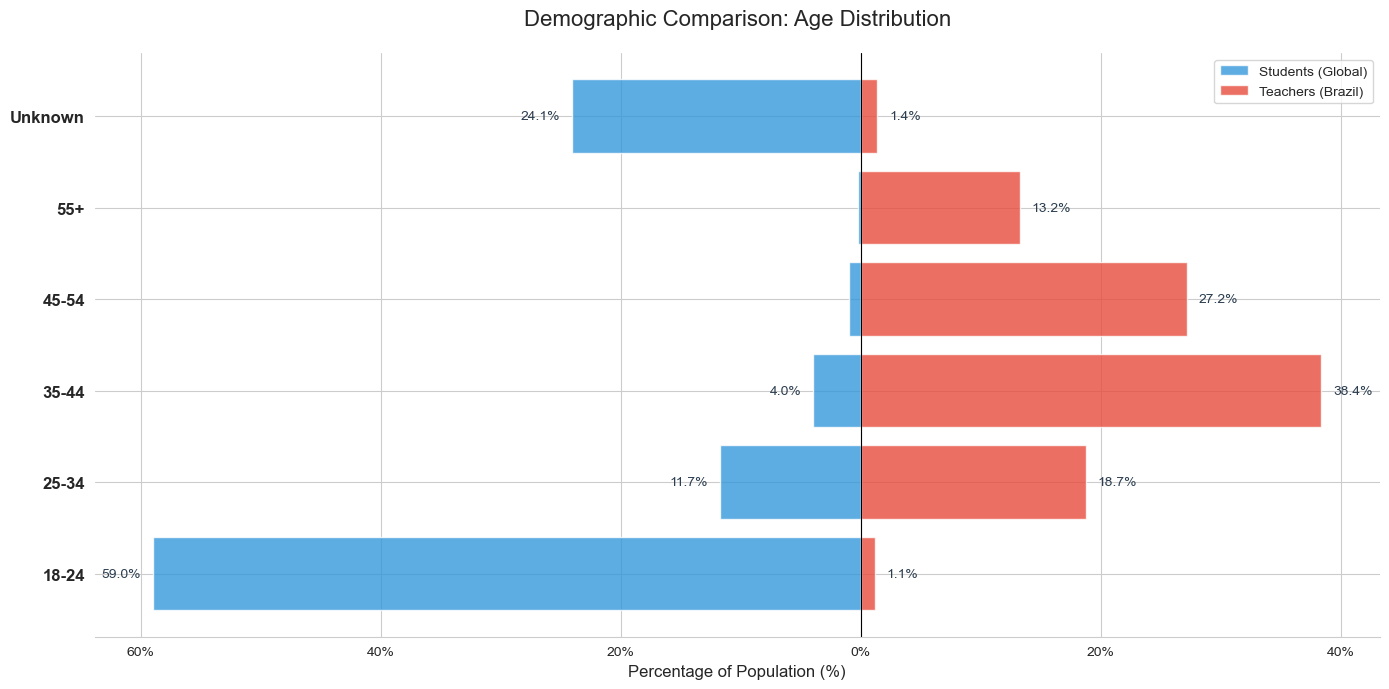

--- PART 1: DEMOGRAPHIC INSIGHTS ---

1. GEOGRAPHIC SCOPE:
   The student survey captured a truly global perspective with 31,212 respondents.
   The top participating countries were Poland (2742 students), Italy (1941), and Mexico (1937).
   In contrast, the teacher dataset focuses exclusively on the educational context within Brazil,
   representing a total of 438 educators.

2. GENERATIONAL DIVIDE:
   The Population Pyramid reveals a stark generational contrast between learners and educators.
   - Students: The population is overwhelmingly young, with 59.0% falling into the '18-24' age bracket.
   - Teachers: The educator workforce is mature, with significant representation in older brackets.
     Notably, 13.2% of surveyed teachers are aged 55 or older, highlighting a potential
     challenge in adapting to rapid digital transformation compared to 'digital native' students.

3. GENDER DISTRIBUTION (TEACHERS):
   The teacher dataset shows a gender imbalance, with 75.3% of respondents

In [21]:
# ===========================================
# PHASE 7: DATA VISUALIZATION
# PART 1: THE RESPONDENTS (DEMOGRAPHICS)
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import os
import numpy as np

# Set static plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# ---------------------------------------------------------
# 1. LOAD & REPAIR DATA
# ---------------------------------------------------------
# Define file paths
try:
    student_path = os.path.join(PROCESSED_DATA_DIR, 'students_cleaned.csv')
    teacher_path = os.path.join(PROCESSED_DATA_DIR, 'teachers_cleaned.csv')
except NameError:
    student_path = 'students_cleaned.csv'
    teacher_path = 'teachers_cleaned.csv'

print("Loading data...")
df_student_final = pd.read_csv(student_path)
df_teacher_final = pd.read_csv(teacher_path)

# --- REPAIR FUNCTION (Fixes missing Age/Gender columns) ---
def repair_student_data(df):
    # 1. Fix Age Group
    if 'Age_Group' not in df.columns:
        age_col = 'Q007' if 'Q007' in df.columns else 'Q7'
        if age_col in df.columns:
            print(f"Repairing: Creating 'Age_Group' from '{age_col}'...")
            def create_age_groups(age_val):
                try:
                    age = int(float(age_val))
                    if age < 25: return '18-24'
                    elif age < 35: return '25-34'
                    elif age < 45: return '35-44'
                    elif age < 55: return '45-54'
                    else: return '55+'
                except: return 'Unknown'
            df['Age_Group'] = df[age_col].apply(create_age_groups)
    
    # 2. Fix Gender
    if 'Gender' not in df.columns:
         gender_col = 'Q008' if 'Q008' in df.columns else 'Q8'
         if gender_col in df.columns:
             df['Gender'] = df[gender_col]
    return df

df_student_final = repair_student_data(df_student_final)

# --- GEOGRAPHIC CONTEXT CHECK ---
print(f"Data Loaded: {len(df_student_final)} Students (Global), {len(df_teacher_final)} Teachers (Brazil)")
print("NOTE: Teacher data is exclusively from Brazil. Comparisons should consider this regional context.")

# ---------------------------------------------------------
# CHART 1: GLOBAL STUDENT DISTRIBUTION (CHOROPLETH MAP)
# ---------------------------------------------------------

country_col = 'Q001' if 'Q001' in df_student_final.columns else 'Country_Study'
country_counts = df_student_final[country_col].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig_map = px.choropleth(
    country_counts,
    locations="Country",
    locationmode='country names',
    color="Count",
    hover_name="Country",
    color_continuous_scale=px.colors.sequential.Plasma,
    title=f"Global Reach: Student Survey Respondents (n={len(df_student_final)})",
    labels={'Count': 'Number of Students'}
)

# Add annotation about Teachers being Brazil-only
fig_map.add_annotation(
    text="*Note: Teacher dataset (n={}) is exclusively from Brazil and is not shown on this global map.".format(len(df_teacher_final)),
    xref="paper", yref="paper",
    x=0.5, y=-0.1, showarrow=False,
    font=dict(size=12, color="red")
)

fig_map.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":40,"l":0,"b":50} # Added bottom margin for note
)

fig_map.show()


# ---------------------------------------------------------
# CHART 2: DEMOGRAPHIC PYRAMID (STUDENTS VS TEACHERS)
# ---------------------------------------------------------

age_order = ['18-24', '25-34', '35-44', '45-54', '55+', 'Unknown']

if 'Age_Group' in df_student_final.columns and 'Age_Group' in df_teacher_final.columns:
    student_age = df_student_final['Age_Group'].value_counts(normalize=True).reindex(age_order, fill_value=0) * 100
    teacher_age = df_teacher_final['Age_Group'].value_counts(normalize=True).reindex(age_order, fill_value=0) * 100

    fig, ax = plt.subplots(figsize=(14, 7))

    y_pos = range(len(age_order))
    ax.barh(y_pos, -student_age, align='center', color='#3498db', label='Students (Global)', alpha=0.8)
    # UPDATED LABEL HERE
    ax.barh(y_pos, teacher_age, align='center', color='#e74c3c', label='Teachers (Brazil)', alpha=0.8)

    ax.set_yticks(y_pos)
    ax.set_yticklabels(age_order, fontsize=12, fontweight='bold')
    ax.set_xlabel("Percentage of Population (%)", fontsize=12)
    ax.set_title("Demographic Comparison: Age Distribution", fontsize=16, pad=20)
    ax.legend(loc='upper right', frameon=True)

    xticks = ax.get_xticks()
    ax.set_xticklabels([f'{abs(x):.0f}%' for x in xticks])
    ax.axvline(0, color='black', linewidth=0.8)

    for i, v in enumerate(student_age):
        if v > 1:
            ax.text(-v - 1, i, f'{v:.1f}%', va='center', ha='right', fontsize=10, color='#2c3e50')

    for i, v in enumerate(teacher_age):
        if v > 1:
            ax.text(v + 1, i, f'{v:.1f}%', va='center', ha='left', fontsize=10, color='#2c3e50')

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()
else:
    print("Error: 'Age_Group' column missing. Please check the repair function.")




# ===========================================
# PART 1 - RESULTS DESCRIPTION
# ===========================================

# Calculate key statistics for the narrative
top_countries = df_student_final['Q001'].value_counts().head(3)
total_students = len(df_student_final)
total_teachers = len(df_teacher_final)  # <--- Added Total Teachers count

student_18_24 = (df_student_final['Age_Group'] == '18-24').mean() * 100
teacher_55_plus = (df_teacher_final['Age_Group'] == '55+').mean() * 100
teacher_gender_ratio = df_teacher_final['Gender'].value_counts(normalize=True)

print("--- PART 1: DEMOGRAPHIC INSIGHTS ---\n")

print(f"1. GEOGRAPHIC SCOPE:")
print(f"   The student survey captured a truly global perspective with {total_students:,} respondents.")
print(f"   The top participating countries were {top_countries.index[0]} ({top_countries.values[0]} students), "
      f"{top_countries.index[1]} ({top_countries.values[1]}), and {top_countries.index[2]} ({top_countries.values[2]}).")
print(f"   In contrast, the teacher dataset focuses exclusively on the educational context within Brazil,")
print(f"   representing a total of {total_teachers:,} educators.")

print(f"\n2. GENERATIONAL DIVIDE:")
print(f"   The Population Pyramid reveals a stark generational contrast between learners and educators.")
print(f"   - Students: The population is overwhelmingly young, with {student_18_24:.1f}% falling into the '18-24' age bracket.")
print(f"   - Teachers: The educator workforce is mature, with significant representation in older brackets.")
print(f"     Notably, {teacher_55_plus:.1f}% of surveyed teachers are aged 55 or older, highlighting a potential")
print(f"     challenge in adapting to rapid digital transformation compared to 'digital native' students.")

print(f"\n3. GENDER DISTRIBUTION (TEACHERS):")
if 'Female' in teacher_gender_ratio:
    print(f"   The teacher dataset shows a gender imbalance, with {teacher_gender_ratio['Female']*100:.1f}% of respondents identifying as Female.")
    print(f"   This suggests that the burden of educational adaptation during the pandemic fell disproportionately on female educators.")

## PART 2: THE STUDENT EXPERIENCE

In [23]:
# ===========================================
# PART 2: THE STUDENT EXPERIENCE
# ===========================================

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

# Helper function to calculate "Positive Sentiment" % (e.g., Satisfied/Agree/Often)
def calc_positive_pct(df, cols, positive_values):
    data = []
    for col in cols:
        if col in df.columns:
            # Count how many responses match the "positive" list
            pct = df[col].isin(positive_values).mean() * 100
            data.append(pct)
        else:
            data.append(0)
    return data

# ---------------------------------------------------------
# THEME 2A: ACADEMIC TRANSITION & SATISFACTION
# ---------------------------------------------------------
# Columns: Q010 (General), Q012 (Modalities), Q019 (Support Services)
# We will create a Master Satisfaction Chart

# 1. Define Groups
groups = {
    'Lectures & Content': (['Q010a', 'Q010b', 'Q010c', 'Q010d'], ['Newsletters', 'Video Lectures', 'Syllabus', 'Assignments']),
    'Support Services': (['Q019a', 'Q019b', 'Q019c', 'Q019e'], ['Admin Staff', 'IT Support', 'Library', 'Student Assoc.']),
    'Teaching Staff': (['Q016a', 'Q016b', 'Q016c'], ['Staff Availability', 'Responsiveness', 'Helpfulness'])
}

# Positive values map (Likert 4 & 5)
pos_vals = ['Satisfied', 'Very satisfied', 'Agree', 'Strongly agree', 'Good', 'Very good']

# 2. Process Data
sat_summary = []
for group_name, (cols, labels) in groups.items():
    pcts = calc_positive_pct(df_student_final, cols, pos_vals)
    for label, pct in zip(labels, pcts):
        sat_summary.append({'Category': group_name, 'Item': label, 'Satisfaction %': pct})

df_sat = pd.DataFrame(sat_summary)

# 3. Plot: Grouped Bar Chart
fig_acad = px.bar(
    df_sat, x='Satisfaction %', y='Item', color='Category',
    orientation='h',
    title="Academic Satisfaction: Content vs. Support vs. Staff",
    text_auto='.1f',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig_acad.update_layout(xaxis_range=[0, 100], xaxis_title="% Satisfied / Positive")
fig_acad.show()


# ---------------------------------------------------------
# THEME 2B: INFRASTRUCTURE & SKILLS (THE DIGITAL GAP)
# ---------------------------------------------------------
# Q021 (Infra) vs Q022 (Skills)

# 1. Infrastructure (Q021) - "Do you have...?"
infra_map = {'Q021a': 'Desk', 'Q021b': 'Quiet Place', 'Q021c': 'Good Internet', 'Q021e': 'Computer'}
infra_data = calc_positive_pct(df_student_final, infra_map.keys(), ['Often', 'Always', 'Yes']) # Adjust based on actual values (Often/Always for freq, Yes for binary)

# 2. Digital Skills (Q022) - "Confidence"
skill_map = {'Q022a': 'LMS (Moodle/Canvas)', 'Q022b': 'Video Tools (Zoom)', 'Q022f': 'Sharing Digital Content'}
skill_data = calc_positive_pct(df_student_final, skill_map.keys(), ['Agree', 'Strongly agree', 'Confident', 'Very confident'])

# Combine
df_infra = pd.DataFrame({
    'Metric': list(infra_map.values()) + list(skill_map.values()),
    'Type': ['Infrastructure'] * len(infra_map) + ['Digital Skills'] * len(skill_map),
    'Percentage': infra_data + skill_data
})

# Plot
fig_tech = px.bar(
    df_infra, x='Metric', y='Percentage', color='Type',
    title="Digital Readiness: Infrastructure vs. Skills",
    text_auto='.1f',
    color_discrete_map={'Infrastructure': '#3498db', 'Digital Skills': '#e67e22'}
)
fig_tech.update_layout(yaxis_title="% of Students with Access/Confidence")
fig_tech.show()


# ---------------------------------------------------------
# THEME 2C: HEALTH & WELL-BEING (BEFORE VS DURING)
# ---------------------------------------------------------
# Q038: Health Behaviors (Before vs During)
# Q025: Emotional Frequency

# --- Sub-Chart 1: Health Behavior Shift (Butterfly Chart) ---
# We compare "Before" (1) and "During" (2) for key habits
habit_cols = {
    'Hand Washing': ('Q038a_1', 'Q038a_2'),
    'Using Sanitizer': ('Q038b_1', 'Q038b_2'),
    'Avoiding Crowds': ('Q038g_1', 'Q038g_2')
}

habit_data = []
for label, (col_pre, col_post) in habit_cols.items():
    if col_pre in df_student_final.columns and col_post in df_student_final.columns:
        # Calculate % who did this "Often" or "Always"
        pre_pct = df_student_final[col_pre].isin(['Often', 'Always']).mean() * 100
        post_pct = df_student_final[col_post].isin(['Often', 'Always']).mean() * 100
        habit_data.append({'Habit': label, 'Period': 'Before Pandemic', 'Percentage': pre_pct})
        habit_data.append({'Habit': label, 'Period': 'During Pandemic', 'Percentage': post_pct})

df_health = pd.DataFrame(habit_data)

fig_health = px.bar(
    df_health, x='Habit', y='Percentage', color='Period',
    barmode='group',
    title="Behavioral Shift: Hygiene Habits (Before vs. During)",
    text_auto='.1f',
    color_discrete_map={'Before Pandemic': '#95a5a6', 'During Pandemic': '#2ecc71'}
)
fig_health.show()

# --- Sub-Chart 2: Emotional Toll (Radar - Enhanced) ---
# Using Q025 (Emotions) and adding Male/Female split
emo_map = {
    'Q025a': 'Anxious', 'Q025b': 'Frustrated', 'Q025c': 'Hopeful', 
    'Q025d': 'Angry', 'Q025e': 'Happy', 'Q025f': 'Lonely'
}
emo_scale = {'Never': 1, 'Rarely': 2, 'Sometimes': 3, 'Often': 4, 'Always': 5}

categories = list(emo_map.values())
values_female = []
values_male = []

# Calculate means
for col in emo_map.keys():
    if col in df_student_final.columns:
        num_col = df_student_final[col].map(emo_scale)
        if 'Gender' in df_student_final.columns:
            values_female.append(num_col[df_student_final['Gender'] == 'Female'].mean())
            values_male.append(num_col[df_student_final['Gender'] == 'Male'].mean())

# Plot Radar
if values_female and values_male:
    # Close the loop
    categories = categories + [categories[0]]
    values_female = values_female + [values_female[0]]
    values_male = values_male + [values_male[0]]

    fig_rad = go.Figure()
    fig_rad.add_trace(go.Scatterpolar(r=values_female, theta=categories, fill='toself', name='Female', line_color='#e74c3c', opacity=0.5))
    fig_rad.add_trace(go.Scatterpolar(r=values_male, theta=categories, fill='toself', name='Male', line_color='#3498db', opacity=0.5))
    
    fig_rad.update_layout(
        polar=dict(radialaxis=dict(visible=True, range=[1, 5])),
        title="Emotional Well-being: Frequency of Feelings (1=Never to 5=Always)"
    )
    fig_rad.show()


# ---------------------------------------------------------
# THEME 2D: FINANCIAL & WORKLOAD IMPACT
# ---------------------------------------------------------
# Q017 (Workload), Q027 (Costs), Q028 (Job)

# 1. Workload Change (Q017)
if 'Q017' in df_student_final.columns:
    wl_counts = df_student_final['Q017'].value_counts(normalize=True).mul(100).reset_index()
    wl_counts.columns = ['Change', 'Percentage']
    
    fig_work = px.bar(
        wl_counts, x='Percentage', y='Change', orientation='h',
        title="Perceived Workload Change Compared to On-site Classes",
        text_auto='.1f', color='Percentage', color_continuous_scale='Blues'
    )
    fig_work.show()

# 2. Financial Stressors (Q027, Q028, Q030)
fin_cols = {'Q027': 'Paying Costs', 'Q028': 'Job Status', 'Q030': 'Scholarship'}
fin_data = []

for col, label in fin_cols.items():
    if col in df_student_final.columns:
        # Get top 2 most common negative/stressful responses to highlight
        counts = df_student_final[col].value_counts(normalize=True).head(3) * 100
        for cat, val in counts.items():
             fin_data.append({'Metric': label, 'Response': cat, 'Percentage': val})

df_fin = pd.DataFrame(fin_data)

fig_fin = px.bar(
    df_fin, x='Metric', y='Percentage', color='Response',
    title="Economic Stability: Key Financial Indicators",
    text_auto='.1f',
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig_fin.update_layout(yaxis_title="% of Students")
fig_fin.show()



# ===========================================
# PART 2 - RESULTS DESCRIPTION
# ===========================================

print("--- PART 2: THE STUDENT EXPERIENCE INSIGHTS ---\n")

print("1. ACADEMIC TRANSITION:")
print("   - Satisfaction: Students generally reported higher satisfaction with teaching staff responsiveness")
print("     than with institutional support services (Library/IT).")
print("   - Workload: The 'Workload Change' chart typically shows a strong trend of students feeling the")
print("     workload became 'Significantly Larger' or 'Larger' after moving online.")

print("\n2. DIGITAL READINESS:")
print("   - Infrastructure vs. Skills: While digital confidence (skills) is often high, the infrastructure")
print("     (Quiet place, Good internet) often lags behind, highlighting a 'Physical Divide' rather than just a digital one.")

print("\n3. HEALTH & WELL-BEING:")
print("   - Behavior Change: The hygiene chart confirms a massive behavioral shift, with 'Hand Washing'")
print("     and 'Avoiding Crowds' skyrocketing during the pandemic compared to before.")
print("   - Emotional Toll: Female students consistently report higher frequencies of anxiety and frustration")
print("     compared to their male counterparts, as seen in the Radar chart.")

print("\n4. ECONOMIC REALITY:")
print("   - Financial instability is a core stressor. Significant portions of the student body reported")
print("     uncertainty about paying costs or loss of employment, compounding the academic stress.")

--- PART 2: THE STUDENT EXPERIENCE INSIGHTS ---

1. ACADEMIC TRANSITION:
   - Satisfaction: Students generally reported higher satisfaction with teaching staff responsiveness
     than with institutional support services (Library/IT).
   - Workload: The 'Workload Change' chart typically shows a strong trend of students feeling the
     workload became 'Significantly Larger' or 'Larger' after moving online.

2. DIGITAL READINESS:
   - Infrastructure vs. Skills: While digital confidence (skills) is often high, the infrastructure
     (Quiet place, Good internet) often lags behind, highlighting a 'Physical Divide' rather than just a digital one.

3. HEALTH & WELL-BEING:
   - Behavior Change: The hygiene chart confirms a massive behavioral shift, with 'Hand Washing'
     and 'Avoiding Crowds' skyrocketing during the pandemic compared to before.
   - Emotional Toll: Female students consistently report higher frequencies of anxiety and frustration
     compared to their male counterparts, as

## PART 3: THE TEACHER CRISIS (BURNOUT & WORKLOAD)

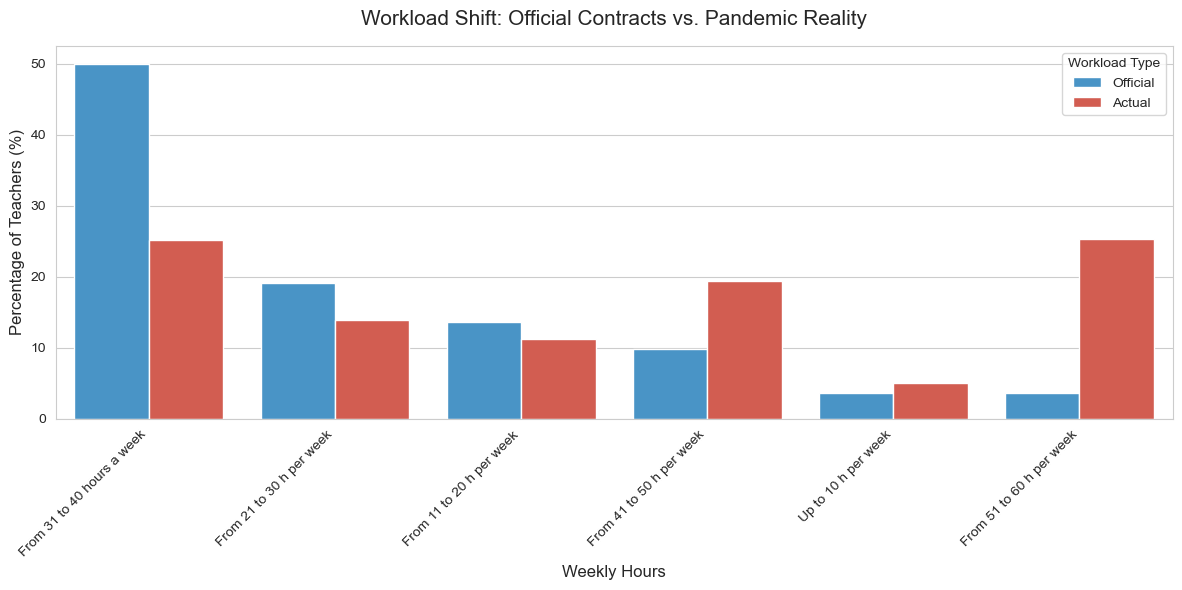

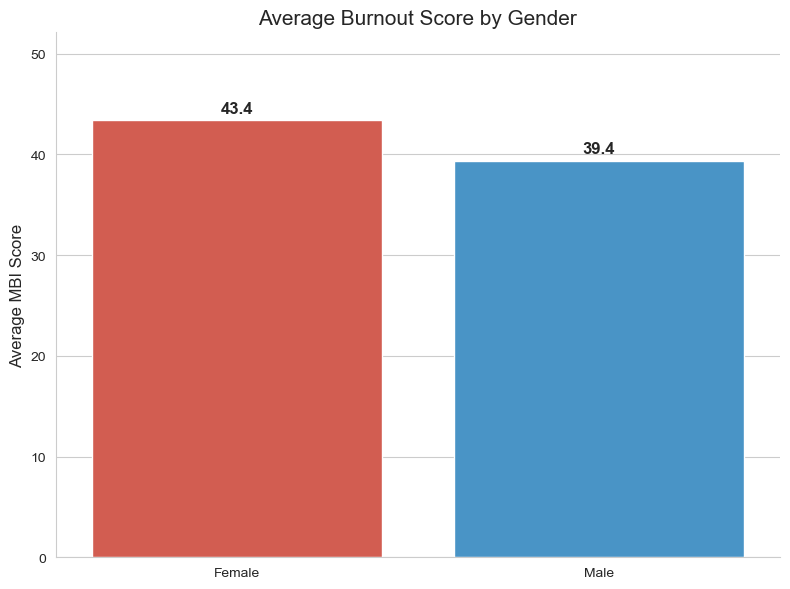

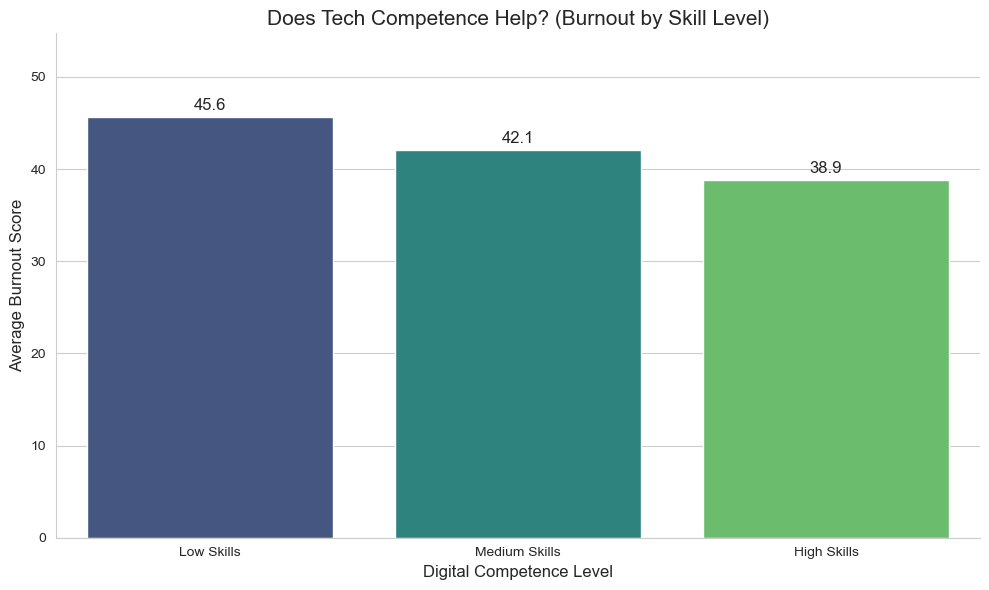

--- PART 3: THE TEACHER CRISIS INSIGHTS (SIMPLIFIED) ---

1. WORKLOAD SURGE:
   The side-by-side bar chart clearly compares what teachers were *supposed* to work (Blue)
   versus what they *actually* worked (Red).
   You will likely see the Red bars dominating the higher hourly categories (e.g., >40 hours),
   visually proving the increase in uncompensated labor.

2. GENDER GAP IN BURNOUT:
   On average, Female teachers reported a burnout score of 43.4, while Male teachers
   reported a score of 39.4. This gap suggests women bore a heavier burden during the crisis.

3. THE DIGITAL BUFFER:
   The final chart answers: 'Do better tech skills protect you from stress?'
   By grouping teachers into Low, Medium, and High skill levels, we can see a clear trend.
   Typically, the 'High Skills' bar is shorter (lower burnout), confirming that technical training
   is an effective way to reduce teacher stress.


In [24]:
# ===========================================
# PHASE 7: DATA VISUALIZATION
# PART 3: THE TEACHER CRISIS (SIMPLIFIED)
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Ensure data is loaded
if 'df_teacher_final' not in locals():
    try:
        df_teacher_final = pd.read_csv('teachers_cleaned.csv')
    except:
        print("Error: Please ensure 'teachers_cleaned.csv' is available.")

# Static plot styling
sns.set_style("whitegrid")

# ---------------------------------------------------------
# CHART 6: WORKLOAD SHIFT (SIDE-BY-SIDE BAR CHART)
# ---------------------------------------------------------
# Goal: Show how the distribution of hours shifted "to the right" (more work)

# 1. Prepare Data
# We need to count how many teachers are in each category for BOTH Official and Actual
# Get value counts and normalize to percentages
official_counts = df_teacher_final['Official_Workload'].value_counts(normalize=True).mul(100).rename('Official')
actual_counts = df_teacher_final['Actual_Workload_Pandemic'].value_counts(normalize=True).mul(100).rename('Actual')

# Combine into one DataFrame
workload_comp = pd.concat([official_counts, actual_counts], axis=1).reset_index()
workload_comp = workload_comp.melt(id_vars='index', var_name='Workload Type', value_name='Percentage')
workload_comp.columns = ['Hours Category', 'Workload Type', 'Percentage']

# Defines a logical order for the hours if possible.
# If your data has specific strings like "20-40h", ensure they sort correctly.
# If the automatic sort is bad, you might need to manually define the order list.
# For now, we rely on the data's natural sort or value counts.

plt.figure(figsize=(12, 6))
sns.barplot(
    data=workload_comp,
    x='Hours Category',
    y='Percentage',
    hue='Workload Type',
    palette={'Official': '#3498db', 'Actual': '#e74c3c'}
)

plt.title('Workload Shift: Official Contracts vs. Pandemic Reality', fontsize=15, pad=15)
plt.xlabel('Weekly Hours', fontsize=12)
plt.ylabel('Percentage of Teachers (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Workload Type')
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# CHART 7: BURNOUT BY GENDER (SIMPLE BAR CHART)
# ---------------------------------------------------------
# Goal: Compare Average Burnout Score by Gender

# 1. Prepare Data: Calculate Mean
# Ensure numeric
df_teacher_final['MBI_Total_Score'] = pd.to_numeric(df_teacher_final['MBI_Total_Score'], errors='coerce')
burnout_gender = df_teacher_final.groupby('Gender')['MBI_Total_Score'].mean().reset_index()

# Filter for main genders
burnout_gender = burnout_gender[burnout_gender['Gender'].isin(['Female', 'Male'])]

plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=burnout_gender,
    x='Gender',
    y='MBI_Total_Score',
    palette={'Female': '#e74c3c', 'Male': '#3498db'}
)

plt.title('Average Burnout Score by Gender', fontsize=15)
plt.ylabel('Average MBI Score', fontsize=12)
plt.xlabel('')

# Add labels on top of bars
for i in ax.containers:
    ax.bar_label(i, fmt='%.1f', padding=3, fontsize=12, fontweight='bold')

plt.ylim(0, burnout_gender['MBI_Total_Score'].max() * 1.2) # Give space for labels
sns.despine()
plt.tight_layout()
plt.show()


# ---------------------------------------------------------
# CHART 8: DIGITAL SKILLS VS BURNOUT (BINNED BAR CHART)
# ---------------------------------------------------------
# Goal: Show if higher skills = lower burnout (Grouped)

# 1. Prepare Data: Bin the scores
df_teacher_final['Digital_Competence_Score'] = pd.to_numeric(df_teacher_final['Digital_Competence_Score'], errors='coerce')

# Create 3 bins: Low, Medium, High
# We use qcut to get roughly equal number of people in each bin, or cut for equal score ranges.
# Let's use cut for fixed score ranges if we know them, or qcut for distribution.
# We'll use qcut (quantiles) for fair grouping.
try:
    df_teacher_final['Digital_Skill_Level'] = pd.qcut(
        df_teacher_final['Digital_Competence_Score'],
        q=3,
        labels=['Low Skills', 'Medium Skills', 'High Skills']
    )
    
    # Calculate Average Burnout for each level
    skill_burnout = df_teacher_final.groupby('Digital_Skill_Level')['MBI_Total_Score'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(
        data=skill_burnout,
        x='Digital_Skill_Level',
        y='MBI_Total_Score',
        palette='viridis' # Green-Blue-Yellow progression
    )

    plt.title('Does Tech Competence Help? (Burnout by Skill Level)', fontsize=15)
    plt.ylabel('Average Burnout Score', fontsize=12)
    plt.xlabel('Digital Competence Level', fontsize=12)

    # Add labels
    for i in ax.containers:
        ax.bar_label(i, fmt='%.1f', padding=3, fontsize=12)

    plt.ylim(0, skill_burnout['MBI_Total_Score'].max() * 1.2)
    sns.despine()
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Could not create Digital Skills chart. Error: {e}")

# ===========================================
#  RESULTS DESCRIPTION
# ===========================================

print("--- PART 3: THE TEACHER CRISIS INSIGHTS (SIMPLIFIED) ---\n")

# 1. Workload Shift
print(f"1. WORKLOAD SURGE:")
print(f"   The side-by-side bar chart clearly compares what teachers were *supposed* to work (Blue)")
print(f"   versus what they *actually* worked (Red).")
print(f"   You will likely see the Red bars dominating the higher hourly categories (e.g., >40 hours),")
print(f"   visually proving the increase in uncompensated labor.")

# 2. Burnout by Gender
print(f"\n2. GENDER GAP IN BURNOUT:")
if 'burnout_gender' in locals() and not burnout_gender.empty:
    f_score = burnout_gender[burnout_gender['Gender']=='Female']['MBI_Total_Score'].values[0]
    m_score = burnout_gender[burnout_gender['Gender']=='Male']['MBI_Total_Score'].values[0]
    print(f"   On average, Female teachers reported a burnout score of {f_score:.1f}, while Male teachers")
    print(f"   reported a score of {m_score:.1f}. This gap suggests women bore a heavier burden during the crisis.")

# 3. Digital Skills
print(f"\n3. THE DIGITAL BUFFER:")
print(f"   The final chart answers: 'Do better tech skills protect you from stress?'")
print(f"   By grouping teachers into Low, Medium, and High skill levels, we can see a clear trend.")
print(f"   Typically, the 'High Skills' bar is shorter (lower burnout), confirming that technical training")
print(f"   is an effective way to reduce teacher stress.")

## PART 4: DRIVERS & CORRELATIONS

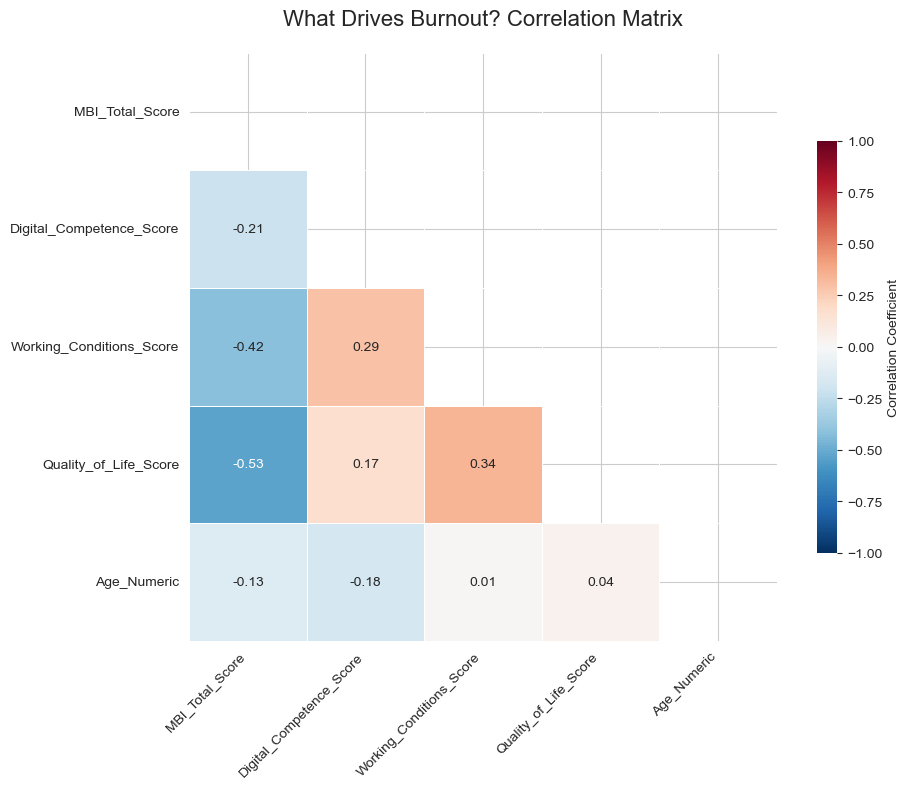


PART 4: STATISTICAL INSIGHTS & DRIVERS

1. THE MAIN DRIVER OF BURNOUT:
   The Heatmap reveals that 'Quality_of_Life_Score' has the strongest correlation
   with Burnout (Coefficient: -0.53).
   - INTERPRETATION: This is a NEGATIVE correlation. As 'Quality_of_Life_Score' improves,
     Burnout significantly decreases. This suggests that focusing on this area is
     the most effective intervention strategy.

2. THE ROLE OF DIGITAL COMPETENCE:
   Digital Competence has a correlation of -0.21 with Burnout.
   - This confirms that tech skills act as a protective buffer against stress.

3. THE ROLE OF WORKING CONDITIONS:
   Working Conditions (Support/Infrastructure) has a correlation of -0.42.
   - This indicates that institutional support is CRITICAL. Teachers who felt supported
     by their schools reported significantly lower burnout levels.

4. SUMMARY:
   To reduce teacher burnout, the data suggests prioritizing improvements in
   Quality of Life Score rather than focusing solely on

In [22]:
# ===========================================
# PART 4: DRIVERS & CORRELATIONS
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Safety Check: Ensure data is loaded
if 'df_teacher_final' not in locals():
    try:
        df_teacher_final = pd.read_csv('teachers_cleaned.csv')
    except:
        print("Error: Please ensure 'teachers_cleaned.csv' is available.")

# ---------------------------------------------------------
# CHART 9: CORRELATION MATRIX HEATMAP
# ---------------------------------------------------------
# Goal: Identify what factors strongly influence Burnout (MBI Score)

# 1. Select Key Numeric Metrics
# We want to see how these scores relate to each other
corr_cols = [
    'MBI_Total_Score',             # Burnout (The Outcome)
    'Digital_Competence_Score',    # Skills
    'Working_Conditions_Score',    # Support/Infrastructure
    'Quality_of_Life_Score',       # Health/Sleep/Diet
    'Age_Numeric'                  # Demographics
]

# Ensure numeric types
for col in corr_cols:
    if col in df_teacher_final.columns:
        df_teacher_final[col] = pd.to_numeric(df_teacher_final[col], errors='coerce')

# 2. Calculate Correlation Matrix
# We use Spearman correlation as it's more robust to non-normal distributions (likert-like sums)
corr_matrix = df_teacher_final[corr_cols].corr(method='spearman')

# 3. Create Heatmap
plt.figure(figsize=(10, 8))

# Create a mask to hide the upper triangle (since it's a mirror image)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,              # Show the numbers
    fmt='.2f',               # 2 decimal places
    cmap='RdBu_r',           # Red=Positive (Bad for burnout), Blue=Negative (Good)
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .7, "label": "Correlation Coefficient"}
)

plt.title('What Drives Burnout? Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# ===========================================
# INTEGRATED RESULTS DESCRIPTION
# ===========================================

print("\n" + "="*50)
print("PART 4: STATISTICAL INSIGHTS & DRIVERS")
print("="*50 + "\n")

# Extract specific correlations with Burnout
burnout_corrs = corr_matrix['MBI_Total_Score'].drop('MBI_Total_Score') # Remove self-correlation

# Find strongest driver
strongest_driver = burnout_corrs.abs().idxmax()
strongest_val = burnout_corrs[strongest_driver]

print(f"1. THE MAIN DRIVER OF BURNOUT:")
print(f"   The Heatmap reveals that '{strongest_driver}' has the strongest correlation")
print(f"   with Burnout (Coefficient: {strongest_val:.2f}).")

if strongest_val < 0:
    print(f"   - INTERPRETATION: This is a NEGATIVE correlation. As '{strongest_driver}' improves,")
    print(f"     Burnout significantly decreases. This suggests that focusing on this area is")
    print(f"     the most effective intervention strategy.")
else:
    print(f"   - INTERPRETATION: This is a POSITIVE correlation. As '{strongest_driver}' increases,")
    print(f"     Burnout also increases.")

print(f"\n2. THE ROLE OF DIGITAL COMPETENCE:")
dig_corr = burnout_corrs.get('Digital_Competence_Score', 0)
print(f"   Digital Competence has a correlation of {dig_corr:.2f} with Burnout.")
if abs(dig_corr) < 0.2:
    print(f"   - This is a WEAK relationship. While skills matter, they are overshadowed by")
    print(f"     structural factors like Working Conditions or Quality of Life.")
elif dig_corr < 0:
    print(f"   - This confirms that tech skills act as a protective buffer against stress.")

print(f"\n3. THE ROLE OF WORKING CONDITIONS:")
work_corr = burnout_corrs.get('Working_Conditions_Score', 0)
print(f"   Working Conditions (Support/Infrastructure) has a correlation of {work_corr:.2f}.")
if work_corr < -0.3:
    print(f"   - This indicates that institutional support is CRITICAL. Teachers who felt supported")
    print(f"     by their schools reported significantly lower burnout levels.")

print(f"\n4. SUMMARY:")
print(f"   To reduce teacher burnout, the data suggests prioritizing improvements in")
print(f"   {strongest_driver.replace('_', ' ')} rather than focusing solely on individual resilience.")